In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving water_potability.csv to water_potability (1).csv


In [20]:
data = pd.read_csv('water_potability.csv')
data.head(50)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


**Removing the columns that contain null values**

In [4]:
data = data.dropna()
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

The Potability column of this dataset is the column we need to predict because it contains values 0 and 1 that indicate whether the water is potable (1) or unfit (0) for consumption

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


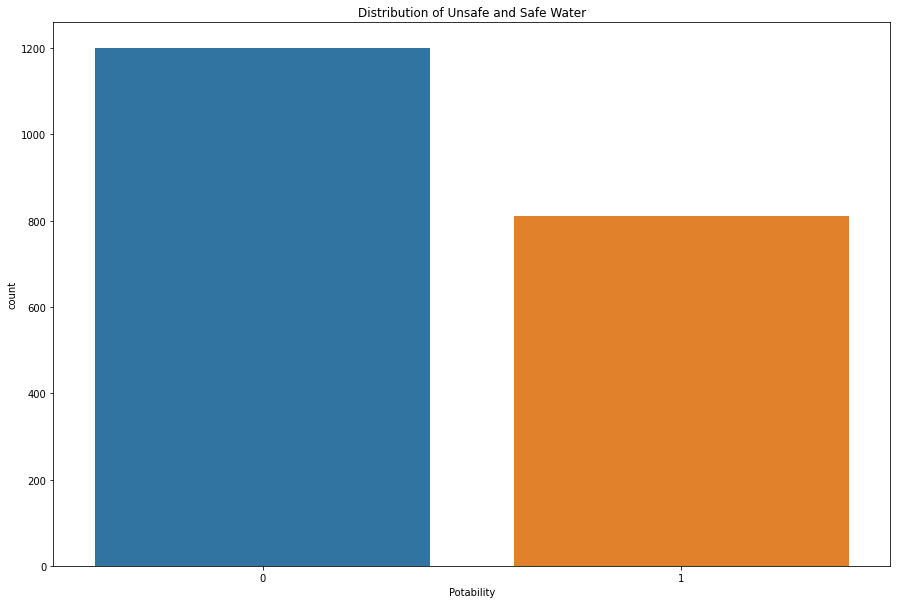

In [5]:
plt.figure(figsize=(15, 10))
sns.countplot(data.Potability)
plt.title("Distribution of Unsafe and Safe Water")
plt.show()

dataset is not balanced because samples of 0s are more than 1s.there are no factors that we cannot ignore that affect water quality, so let’s explore all the columns one by one. Let’s start by looking at the ph column:

In [6]:
import plotly.express as px
data = data
figure = px.histogram(data, x = "ph", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: PH")
figure.show()

The ph column represents the ph value of the water which is an important factor in evaluating the acid-base balance of the water. The pH value of drinking water should be between 6.5 and 8.5. Now let’s look at the second factor affecting water quality in the dataset:

In [7]:
figure = px.histogram(data, x = "Hardness", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Hardness")
figure.show()

The hardness of water usually depends on its source, but water with a hardness of 120-200 milligrams is drinkable.

In [8]:
figure = px.histogram(data, x = "Solids", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Solids")
figure.show()

The figure above represents the distribution of total dissolved solids in water in the dataset. All organic and inorganic minerals present in water are called dissolved solids. Water with a very high number of dissolved solids is highly mineralized. 

In [9]:
figure = px.histogram(data, x = "Chloramines", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Chloramines")
figure.show()

The figure above represents the distribution of chloramine in water in the dataset. Chloramine and chlorine are disinfectants used in public water systems.

In [10]:
figure = px.histogram(data, x = "Sulfate", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Sulfate")
figure.show()

The figure above shows the distribution of sulfate in water in the dataset. They are substances naturally present in minerals, soil and rocks. Water containing less than 500 milligrams of sulfate is safe to drink.

In [11]:
figure = px.histogram(data, x = "Conductivity", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Conductivity")
figure.show()

The figure above represents the distribution of water conductivity in the dataset. Water is a good conductor of electricity, but the purest form of water is not a good conductor of electricity. Water with an electrical conductivity of less than 500 is drinkable

In [12]:
figure = px.histogram(data, x = "Organic_carbon", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Organic Carbon")
figure.show()

The figure above represents the distribution of organic carbon in water in the dataset. Organic carbon comes from the breakdown of natural organic materials and synthetic sources. Water containing less than 25 milligrams of organic carbon is considered safe to drink.

In [13]:
figure = px.histogram(data, x = "Trihalomethanes", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Trihalomethanes")
figure.show()

The figure above represents the distribution of trihalomethanes or THMs in water in the dataset. THMs are chemicals found in chlorine-treated water. Water containing less than 80 milligrams of THMs is considered safe to drink. 

In [14]:
figure = px.histogram(data, x = "Turbidity", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Turbidity")
figure.show()

The figure above represents the distribution of turbidity in water. The turbidity of water depends on the number of solids present in suspension. Water with a turbidity of fewer than 5 milligrams is considered drinkable.

**Water Quality Prediction Model using Python**

In [15]:
!pip install pycaret

PyCaret is an open-source machine learning library that helps automate the entire process of training a machine learning model. From model selection to training and testing, PyCaret is a great tool that can be used in machine learning. The best feature of PyCaret is that it helps you know which is the best machine learning model that you should use on a particular dataset. It simply shows you the best performing models by ranking the models based on the performance measurement metrics of machine learning models. The best part about this feature is that it does everything with a few lines of code.

correlation of all the features with respect to the Potability column in the dataset:

In [17]:
correlation = data.corr()
correlation["ph"].sort_values(ascending=False)

ph                 1.000000
Hardness           0.108948
Organic_carbon     0.028375
Trihalomethanes    0.018278
Potability         0.014530
Conductivity       0.014128
Sulfate            0.010524
Chloramines       -0.024768
Turbidity         -0.035849
Solids            -0.087615
Name: ph, dtype: float64

Now below is how you can see which machine learning algorithm is best for this dataset by using the PyCaret library in Python:

In [18]:
from pycaret.classification import *
clf = setup(data, target = "Potability", silent = True, session_id = 786)
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6830,0.7005,0.4197,0.6744,0.5133,0.2976,0.3182,1.129
qda,Quadratic Discriminant Analysis,0.6823,0.7192,0.3985,0.6883,0.5013,0.2917,0.3174,0.037
et,Extra Trees Classifier,0.6816,0.6941,0.3861,0.6858,0.4916,0.2863,0.3123,0.632
lightgbm,Light Gradient Boosting Machine,0.6652,0.6916,0.4762,0.6078,0.5324,0.2781,0.2840,0.260
gbc,Gradient Boosting Classifier,0.6602,0.6738,0.3718,0.6306,0.4667,0.2419,0.2603,0.530
nb,Naive Bayes,0.6184,0.6078,0.2478,0.5545,0.3412,0.1261,0.1462,0.038
dt,Decision Tree Classifier,0.6034,0.5895,0.5186,0.5049,0.5097,0.1775,0.1784,0.084
lr,Logistic Regression,0.5984,0.5199,0.0071,0.1900,0.0134,0.0028,0.0127,0.819
ridge,Ridge Classifier,0.5984,0.0000,0.0089,0.1583,0.0168,0.0035,0.0056,0.033
dummy,Dummy Classifier,0.5984,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.012


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=786, verbose=0,
                       warm_start=False)

According to the above result, the random forecast classification algorithm is best for training a machine learning model for the task of water quality analysis. So let’s train the model and examine its predictions:

In [19]:
model = create_model("rf")
predict = predict_model(model, data=data)
predict.head()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7376,0.7545,0.4737,0.7941,0.5934,0.4174,0.4478
1,0.6525,0.6687,0.3860,0.6111,0.4731,0.2331,0.2468
2,0.6879,0.7056,0.4386,0.6757,0.5319,0.3134,0.3299
3,0.6738,0.7172,0.3684,0.6774,0.4773,0.2691,0.2955
4,0.6667,0.6885,0.3158,0.6923,0.4337,0.2417,0.2791
5,0.6312,0.6404,0.3929,0.5500,0.4583,0.1904,0.1966
6,0.7092,0.7192,0.5357,0.6667,0.5941,0.3717,0.3771
7,0.6786,0.6988,0.5000,0.6222,0.5545,0.3077,0.3122
8,0.7071,0.7090,0.3750,0.7778,0.5060,0.3322,0.3769
9,0.6857,0.7033,0.4107,0.6765,0.5111,0.2994,0.3196


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Label,Score
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,0,0.87
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,0,0.91
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0,0,0.83
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0,0,0.89
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0,0,0.94
